# Mean Squared Error

_Mean Squared Error_ is a loss function that measures the average squared difference between the predicted values and the actual values. It is used for regression problems, where the goal is to predict a continuous value. 

As a reminder, a continuous value is a numerical value that can take on any value in a given range. For instance, the height of a person or the temperature outside are continuous values.

MSE measures how well a model predicts an unknown quantity.

When the MSE gets smaller, it means the model is getting better at predicting the quantity

Given a set of data points `(x,y)`, the goal here is to find a line that best fits the data: the line that will minimize the MSE is the one that has the least error in predicting `y` for a given `x`

These are the steps required to calculate the MSE:
  
- find the predicted values (`y'`) for each `x` value using the model
- substract the predicted values from the actual values (`y - y'`)
- this will give you the errors `e` for each `x` value
- square each error (`e^2`) to remove any negative sign
- add up all the squared errors (`sum(e^2)`)
- divide the _Sum of Squared Errors_ by the number of data points to get the MSE (`sum(e^2) / n`)

We remove the negative signs from the errors in MSE because we are interested in the _magnitude_ of the errors, not their _direction_. If we don't square the errors, then positive and negative errors could cancel each other out and give us a misleading impression of how accurate the model or the estimator is. 

For example, if we have two errors of -2 and 2, their sum is zero, but that doesn't mean there is no error at all. By squaring the errors, we ensure that all errors are positive and contribute to the MSE. Squaring also gives more weight to larger errors, which reflects the fact that they are more problematic than smaller errors. This will help us correct our model better.

## The MSE formula

![formula](mse_formula.png)

Let's break this down a bit:

- `1/n` is a mathematical way of saying "take the average"
- `Σ` is the greek letter sigma, which means "sum"
- `i=1` means that we start at 1
- `n` means that we stop at `n`
- `yᵢ` is the actual value of the `i`th observation
- `ŷᵢ` is the predicted value of the `i`th observation
- `(yᵢ - ŷᵢ)^2` is the difference between the actual value and the predicted value, squared

In [1]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

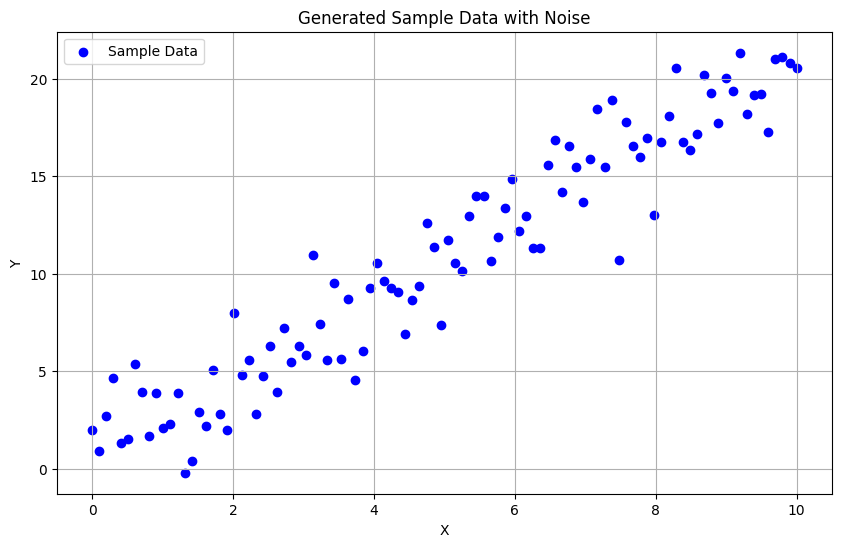

In [2]:
# ok let's vizualize the MSE now !

# Set a random seed for reproductibility
np.random.seed(42)

# let's generate a sample of data points `(x, y)` where `y = 2x + 1 + noise`
# we add noise here to make the problem a bit more realistic

# Number of data points
n = 100

# Generate x values
x = np.linspace(0, 10, n)

# True slope (m) and intercept (c) for our "underlying real world" linear relationship
m = 2
c = 1

# Generate y values based on our linear function, but add some noise
# the `np.random.normal` function adds some random noise to the data
# its parameters are the mean, the standard deviation, and the size (number of numbers to generate) of the noise
y = m * x + c + np.random.normal(0, 2, n)

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label="Sample Data")
plt.title("Generated Sample Data with Noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

For the purpose of the demo, let's assume that our model will be a simple linear regression:

`y' = m'x + c'`

... where `m'` and `c'` are the predicted parameters of the model and `y'` is the predicted value for the input data `x`.

Let's define a function that computes the MSE given the actual `y` values, predicted `y'` values, and the number of data points `n`. We'll then use this function to compute the MSE for our sample data and a hypothetical model.

In [3]:
def compute_mse(y_actual, y_pred):
    """
    Compute the Mean Squared Error (MSE) between actual and predicted values.
    """
    # Calculate the errors
    errors = y_actual - y_pred
    
    # Square the errors
    squared_errors = errors ** 2
    
    # Calculate the MSE
    mse = np.mean(squared_errors)
    
    return mse

# Hypothetical model parameters (we'll choose values close to the true ones for demonstration)
m_prime = 1.9
c_prime = 1.5

# Predict y values using the hypothetical model
y_pred = m_prime * x + c_prime

# Compute the MSE for the sample data and the hypothetical model
mse = compute_mse(y, y_pred)

mse


3.4411484078319408

The output value quantifies how well our model's predictions match the actual data on average.

Now let's represent visually the magnitude of the errors with our MSE:

- the blue dots represent the actual data points
- the red line represents the predictions of our model
- the dashed gray lines represent the differences between the data points and the predictions, the length of the gray line is what is called _magnitude_ of the error for each data point

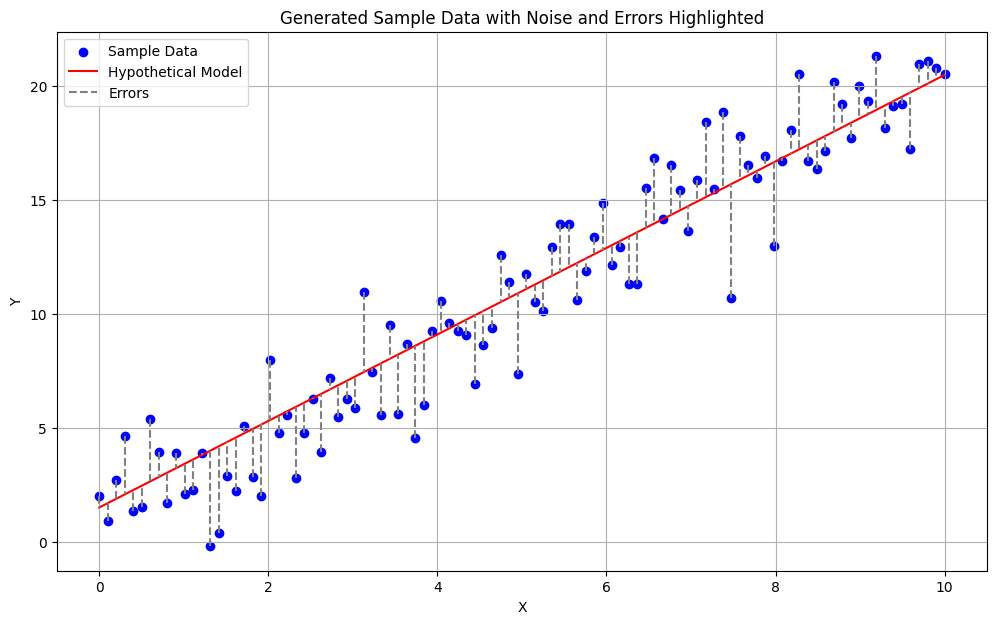

In [4]:
# Plotting the data, predictions, and errors
plt.figure(figsize=(12, 7))
plt.scatter(x, y, color='blue', label="Sample Data")
plt.plot(x, y_pred, color='red', label="Hypothetical Model")
plt.vlines(x, y, y_pred, color='gray', linestyle='dashed', label='Errors')
plt.title("Generated Sample Data with Noise and Errors Highlighted")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


## Under and Over prediction

TL;DR: when it _over predicts_, the model's prediction is too high; when it _under predicts_, the model's prediction is too low.

In our example, over predicted values are the points of the red line that are above the blue dots. Under predicted values are the points of the red line that are below the blue dots.

We wouldn't have had this vizualisation if we didn't square the errors; instead, we would have obtained a negative value and we would have been tricked into the idea that the model is consistently under predicting. Moreover, if the errors were symmetrically distributed around the line, the mean would have been 0 and we would have been tricked into the idea that the model is perfect.